<a href="https://colab.research.google.com/github/brahim12-hgt/-Pr-diction-des-Prix-Immobiliers-au-Maroc/blob/main/housing_price_ml_pipeline-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
torch.device("cpu")


device(type='cpu')

# 🏠 Pipeline ML - Prédiction des Prix Immobiliers au Maroc

Ce notebook implémente un pipeline complet de Machine Learning pour prédire les prix des maisons au Maroc avec le dataset Kaggle.

**Pipeline inclut:**
- ✅ Chargement et exploration des données
- ✅ Nettoyage et prétraitement
- ✅ Feature engineering
- ✅ Entraînement de 7 modèles différents
- ✅ Optimisation des hyperparamètres
- ✅ Évaluation et comparaison détaillée

In [25]:
# Imports essentiels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Modèles
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Métriques
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Configuration visuelle
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

print("✅ Tous les packages importés avec succès!")

✅ Tous les packages importés avec succès!


## 📊 1. Chargement et Exploration des Données

In [26]:
# Charger le dataset
# IMPORTANT: Ajoutez le dataset 'housing-data-english-desc' à votre notebook Kaggle
df = pd.read_csv('/content/archive (2).zip')

print(f"📏 Dimensions du dataset: {df.shape[0]} lignes x {df.shape[1]} colonnes")
print(f"\n📋 Aperçu des premières lignes:")
display(df.head())

print(f"\n🔍 Types de colonnes:")
display(df.dtypes)

📏 Dimensions du dataset: 4675 lignes x 15 colonnes

📋 Aperçu des premières lignes:


,Unnamed: 0.1,Unnamed: 0,new_price,desc,address,chambres,salles de bains,surface,ascenseur,floor,terrasse,parking,Type,City,Nighberd
0,0,0,1000000,98 m² crossing apartment in the heart of the B...,Appartement à vendre Casablanca - Belvédère,2,1,98,Yes,5,Yes,No,Appartement,Casablanca,Belvédère
1,1,1,1750000,Office for sale of 173 m² in Casablanca - Your...,Bureau à vendre Casablanca - Autre,1,2,173,Yes,7,Yes,No,Bureau,Casablanca,Autre
2,2,2,2600000,"Discover your future home in Mandarona, Casabl...",Appartement à vendre Casablanca - Californie,3,2,150,Yes,3,Yes,Yes,Appartement,Casablanca,Californie
3,3,3,2290000,For Sale - Bright apartment of 130 m² fully re...,Appartement à vendre Casablanca - Les Hôpitaux,2,1,130,Yes,3,No,No,Appartement,Casablanca,Les Hôpitaux
4,4,4,1460000,Welcome to this charming apartment located in ...,Appartement à vendre Meknès - Hamria,3,2,163,Yes,2,No,No,Appartement,Meknès,Hamria



🔍 Types de colonnes:


,0
Unnamed: 0.1,int64
Unnamed: 0,int64
new_price,int64
desc,object
address,object
chambres,int64
salles de bains,int64
surface,int64
ascenseur,object
floor,int64


In [27]:
# Statistiques descriptives
print("📊 Statistiques descriptives:")
display(df.describe())

print("\nℹ️ Informations générales:")
df.info()

📊 Statistiques descriptives:


,Unnamed: 0.1,Unnamed: 0,new_price,chambres,salles de bains,surface,floor
count,4675.000000,4675.000000,4.675000e+03,4675.00000,4675.000000,4675.000000,4675.000000
mean,2337.000000,2337.000000,1.871291e+06,2.32000,1.680000,143.720000,3.200000
std,1349.700584,1349.700584,1.348472e+06,1.91269,0.835314,158.579131,1.385789
min,0.000000,0.000000,6.770260e+05,1.00000,1.000000,32.000000,1.000000
25%,1168.500000,1168.500000,1.000000e+06,1.00000,1.000000,50.000000,3.000000
50%,2337.000000,2337.000000,1.460000e+06,2.00000,1.000000,83.000000,3.000000
75%,3505.500000,3505.500000,1.794000e+06,3.00000,2.000000,150.000000,4.000000
max,4674.000000,4674.000000,6.800000e+06,10.00000,4.000000,720.000000,7.000000



ℹ️ Informations générales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0.1     4675 non-null   int64 
 1   Unnamed: 0       4675 non-null   int64 
 2   new_price        4675 non-null   int64 
 3   desc             4675 non-null   object
 4   address          4675 non-null   object
 5   chambres         4675 non-null   int64 
 6   salles de bains  4675 non-null   int64 
 7   surface          4675 non-null   int64 
 8   ascenseur        4675 non-null   object
 9   floor            4675 non-null   int64 
 10  terrasse         4675 non-null   object
 11  parking          4675 non-null   object
 12  Type             4675 non-null   object
 13  City             4675 non-null   object
 14  Nighberd         4675 non-null   object
dtypes: int64(7), object(8)
memory usage: 548.0+ KB


In [28]:
# Analyse des valeurs manquantes
missing = df.isnull().sum()
missing_pct = 100 * missing / len(df)
missing_df = pd.DataFrame({
    'Valeurs_Manquantes': missing,
    'Pourcentage': missing_pct.round(2)
})
missing_df = missing_df[missing_df['Valeurs_Manquantes'] > 0].sort_values('Valeurs_Manquantes', ascending=False)

if len(missing_df) > 0:
    print("❓ Valeurs manquantes détectées:")
    display(missing_df)
else:
    print("✅ Aucune valeur manquante détectée!")

✅ Aucune valeur manquante détectée!


In [29]:
# Identifier la colonne cible (prix)
price_candidates = [col for col in df.columns if any(word in col.lower() for word in ['price', 'prix', 'cost', 'cout'])]

if len(price_candidates) > 0:
    price_col = price_candidates[0]
    print(f"🎯 Colonne cible identifiée: '{price_col}'")
else:
    # Si pas trouvée automatiquement, utiliser la dernière colonne ou demander
    price_col = df.columns[-1]
    print(f"⚠️ Colonne cible assumée: '{price_col}'")
    print("Si ce n'est pas correct, modifiez la variable 'price_col'")

🎯 Colonne cible identifiée: 'new_price'


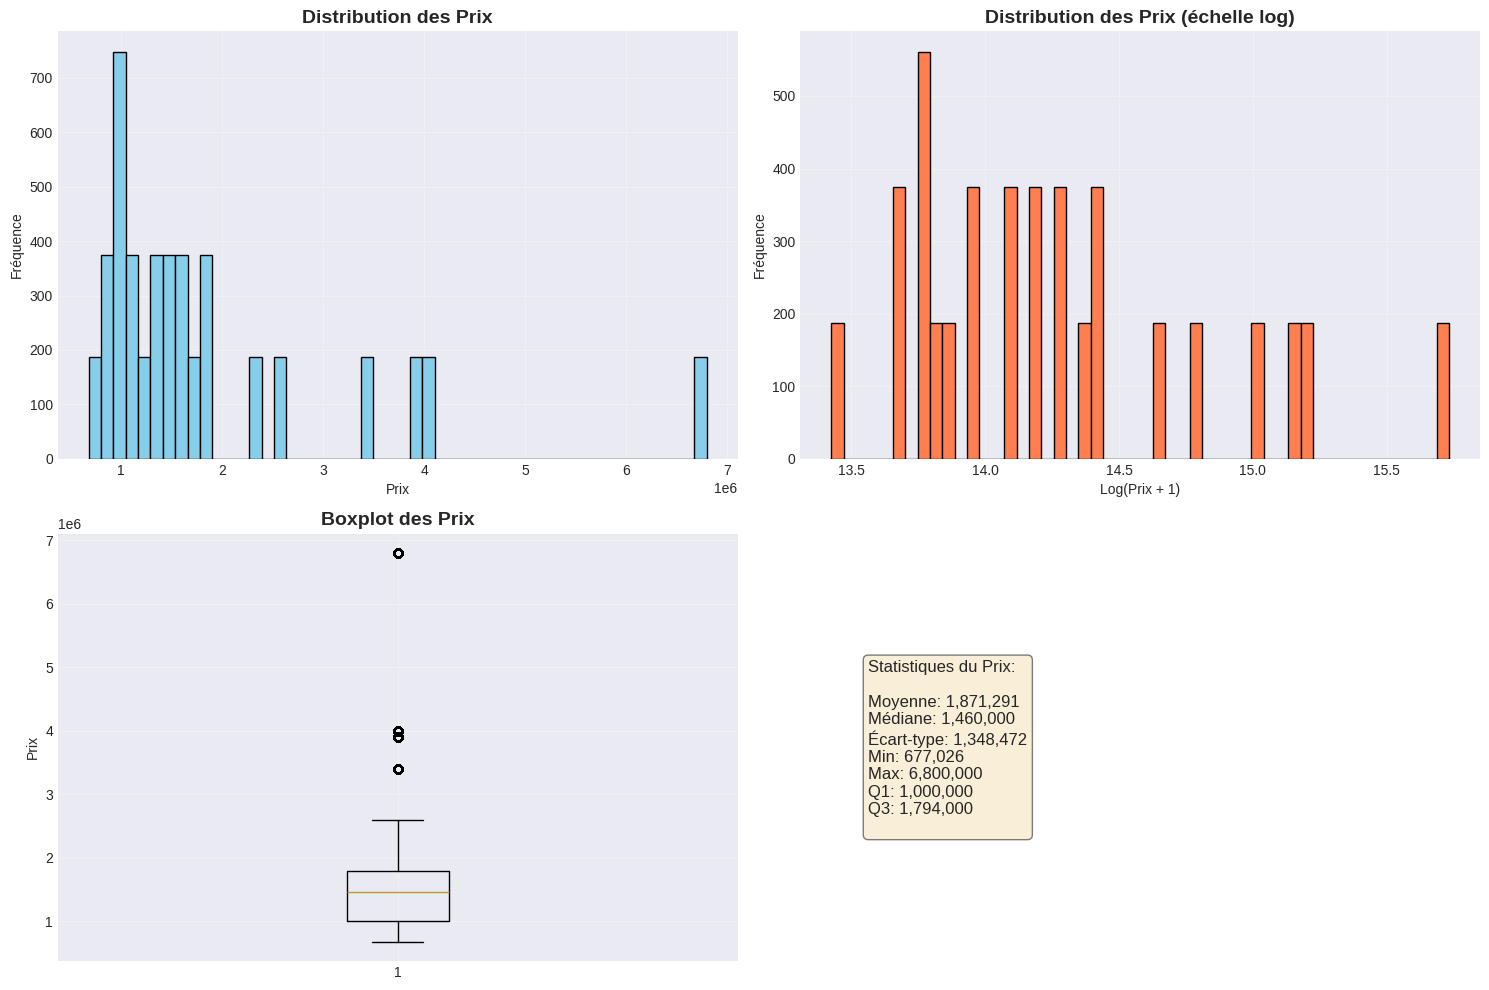

In [30]:
# Visualisation de la distribution du prix
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution normale
axes[0, 0].hist(df[price_col].dropna(), bins=50, edgecolor='black', color='skyblue')
axes[0, 0].set_title('Distribution des Prix', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Prix')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].grid(True, alpha=0.3)

# Distribution log
axes[0, 1].hist(np.log1p(df[price_col].dropna()), bins=50, edgecolor='black', color='coral')
axes[0, 1].set_title('Distribution des Prix (échelle log)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Log(Prix + 1)')
axes[0, 1].set_ylabel('Fréquence')
axes[0, 1].grid(True, alpha=0.3)

# Boxplot
axes[1, 0].boxplot(df[price_col].dropna(), vert=True)
axes[1, 0].set_title('Boxplot des Prix', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Prix')
axes[1, 0].grid(True, alpha=0.3)

# Statistiques
stats_text = f"""Statistiques du Prix:

Moyenne: {df[price_col].mean():,.0f}
Médiane: {df[price_col].median():,.0f}
Écart-type: {df[price_col].std():,.0f}
Min: {df[price_col].min():,.0f}
Max: {df[price_col].max():,.0f}
Q1: {df[price_col].quantile(0.25):,.0f}
Q3: {df[price_col].quantile(0.75):,.0f}
"""
axes[1, 1].text(0.1, 0.5, stats_text, fontsize=12, verticalalignment='center',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

## 🧹 2. Nettoyage et Prétraitement

In [31]:
# Copie de travail
df_clean = df.copy()

# Supprimer les lignes avec prix manquant
df_clean = df_clean.dropna(subset=[price_col])
print(f"📏 Taille après suppression des prix manquants: {df_clean.shape}")

📏 Taille après suppression des prix manquants: (4675, 15)


In [32]:
# Identifier les colonnes numériques et catégorielles
numeric_features = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

# Retirer la colonne cible des features
if price_col in numeric_features:
    numeric_features.remove(price_col)

print(f"🔢 Features numériques ({len(numeric_features)}): {numeric_features}")
print(f"\n📝 Features catégorielles ({len(categorical_features)}): {categorical_features}")

🔢 Features numériques (6): ['Unnamed: 0.1', 'Unnamed: 0', 'chambres', 'salles de bains', 'surface', 'floor']

📝 Features catégorielles (8): ['desc', 'address', 'ascenseur', 'terrasse', 'parking', 'Type', 'City', 'Nighberd']


In [33]:
# Traitement des outliers sur le prix (méthode IQR)
def remove_outliers_iqr(df, column, multiplier=3.0):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    before = len(df)
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    after = len(df_filtered)
    removed = before - after

    print(f"Outliers supprimés: {removed} ({100*removed/before:.1f}%)")
    return df_filtered

print(f"Avant: {len(df_clean)} lignes")
df_clean = remove_outliers_iqr(df_clean, price_col, multiplier=3.0)
print(f"Après: {len(df_clean)} lignes")

Avant: 4675 lignes
Outliers supprimés: 187 (4.0%)
Après: 4488 lignes


In [34]:
# Remplir les valeurs manquantes numériques avec la médiane
for col in numeric_features:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"✅ {col}: {df_clean[col].isnull().sum()} valeurs manquantes remplies avec {median_val}")

In [35]:


# Remplir les valeurs manquantes
df_clean[categorical_features] = df_clean[categorical_features].fillna("Unknown")

# OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", ohe, categorical_features)
    ],
    remainder="drop"
)

# Fit & transform
encoded_data = preprocessor.fit_transform(df_clean)

# Récupérer les noms des colonnes encodées
encoded_feature_names = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features)

# Affichage détaillé
for col in categorical_features:
    col_features = [f for f in encoded_feature_names if f.startswith(col + "_")]
    print(f"✅ {col} → {len(col_features)} colonnes encodées")
    for f in col_features:
        print(f"   - {f}")

print(f"\n✅ Total colonnes encodées : {len(encoded_feature_names)}")

✅ desc → 24 colonnes encodées
   - desc_(Photos of the witness apartment)

High -standing studios in the heart of Casablanca - Princesses

Treat yourself to a unique living environment in the prized district of princesses in Casablanca, where elegance, comfort and modernity unite to create the ideal habitat.

Studios from 32 to 62 m², specially designed for young workers, investors or those looking for their first acquisition in a sought after sector.

High -end finishes:

- Imported marble, fully equipped German kitchen, stimulating air conditioning for optimal comfort.
- Exclusive services: concierge available 24 hours a day, laundromat, winter box and hotel services.

Commercial premises to discover:

- from 63 to 122 m², perfect for entrepreneurs and investors looking for visibility and accessibility.

Choice location:

- Ideally located near shops, transport and services, in a secure and eco-designed residence.
- a profitable investment and a guaranteed quality of life, in the hea

## 🎯 3. Préparation pour l'Entraînement

In [36]:
# Séparation features / target
X = df_clean.drop(columns=[price_col])
y = df_clean[price_col]

print(f"📊 Features (X): {X.shape}")
print(f"🎯 Target (y): {y.shape}")
print(f"\nColonnes utilisées comme features:")
print(X.columns.tolist())

📊 Features (X): (4488, 14)
🎯 Target (y): (4488,)

Colonnes utilisées comme features:
['Unnamed: 0.1', 'Unnamed: 0', 'desc', 'address', 'chambres', 'salles de bains', 'surface', 'ascenseur', 'floor', 'terrasse', 'parking', 'Type', 'City', 'Nighberd']


In [37]:
# Split train/test avec stratification si possible
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"✅ Données divisées:")
print(f"   Training: {X_train.shape[0]} exemples ({100*X_train.shape[0]/len(X):.1f}%)")
print(f"   Test: {X_test.shape[0]} exemples ({100*X_test.shape[0]/len(X):.1f}%)")

✅ Données divisées:
   Training: 3590 exemples (80.0%)
   Test: 898 exemples (20.0%)


In [40]:
# Preprocessing: Standardisation des features numériques et One-Hot Encoding pour les features catégorielles

# Définir le ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop' # Drop any columns not specified in 'num' or 'cat' transformers
)

# Appliquer les transformations
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

print("✅ Features transformées (scalées et encodées)")
print(f"   Shape X_train_scaled: {X_train_scaled.shape}")
print(f"   Shape X_test_scaled: {X_test_scaled.shape}")

# Note: Les moyennes et écarts-types ci-dessous sont pour l'ensemble de la matrice transformée
# qui inclut à la fois des features scalées et des features one-hot encodées.
print(f"   Moyenne train (globale): {X_train_scaled.mean():.4f}")
print(f"   Écart-type train (globale): {X_train_scaled.std():.4f}")

✅ Features transformées (scalées et encodées)
   Shape X_train_scaled: (3590, 81)
   Shape X_test_scaled: (898, 81)
   Moyenne train (globale): 0.0988
   Écart-type train (globale): 0.4038


## 🤖 4. Entraînement des Modèles

In [41]:
# Fonction d'évaluation complète
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Entraîne et évalue un modèle avec métriques complètes"""

    # Entraînement
    print(f"  Entraînement en cours...")
    model.fit(X_train, y_train)

    # Prédictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Métriques train
    train_r2 = r2_score(y_train, y_pred_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    train_mae = mean_absolute_error(y_train, y_pred_train)

    # Métriques test
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)

    # Cross-validation
    print(f"  Cross-validation (5-fold)...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5,
                                 scoring='r2', n_jobs=-1)

    # Résultats
    results = {
        'Modèle': model_name,
        'Train R²': round(train_r2, 4),
        'Test R²': round(test_r2, 4),
        'Train RMSE': round(train_rmse, 2),
        'Test RMSE': round(test_rmse, 2),
        'Test MAE': round(test_mae, 2),
        'CV R² (mean)': round(cv_scores.mean(), 4),
        'CV R² (std)': round(cv_scores.std(), 4),
        'Overfitting': round(train_r2 - test_r2, 4)
    }

    print(f"  ✅ Terminé - Test R²: {test_r2:.4f}")

    return results, model, y_pred_test

In [42]:
# Définition des modèles avec hyperparamètres optimisés
models = {
    'Linear Regression': LinearRegression(),

    'Ridge': Ridge(
        alpha=10.0,
        random_state=42
    ),

    'Lasso': Lasso(
        alpha=10.0,
        random_state=42,
        max_iter=10000
    ),

    'Random Forest': RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ),

    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        random_state=42
    ),

    'XGBoost': XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ),

    'LightGBM': LGBMRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    )
}

print(f"🎯 {len(models)} modèles configurés et prêts à l'entraînement")

🎯 7 modèles configurés et prêts à l'entraînement


In [43]:
# Entraîner tous les modèles
results_list = []
trained_models = {}
predictions = {}

print("🚀 Démarrage de l'entraînement...\n")
print("="*80)

for name, model in models.items():
    print(f"\n🔄 {name}")
    print("-" * 40)

    results, trained_model, y_pred = evaluate_model(
        model,
        X_train_scaled, X_test_scaled,
        y_train, y_test,
        name
    )

    results_list.append(results)
    trained_models[name] = trained_model
    predictions[name] = y_pred

print("\n" + "="*80)
print("✅ Tous les modèles entraînés avec succès!")
print("="*80)

🚀 Démarrage de l'entraînement...


🔄 Linear Regression
----------------------------------------
  Entraînement en cours...
  Cross-validation (5-fold)...
  ✅ Terminé - Test R²: 1.0000

🔄 Ridge
----------------------------------------
  Entraînement en cours...
  Cross-validation (5-fold)...
  ✅ Terminé - Test R²: 0.9999

🔄 Lasso
----------------------------------------
  Entraînement en cours...
  Cross-validation (5-fold)...
  ✅ Terminé - Test R²: 1.0000

🔄 Random Forest
----------------------------------------
  Entraînement en cours...
  Cross-validation (5-fold)...
  ✅ Terminé - Test R²: 1.0000

🔄 Gradient Boosting
----------------------------------------
  Entraînement en cours...
  Cross-validation (5-fold)...
  ✅ Terminé - Test R²: 1.0000

🔄 XGBoost
----------------------------------------
  Entraînement en cours...
  Cross-validation (5-fold)...
  ✅ Terminé - Test R²: 1.0000

🔄 LightGBM
----------------------------------------
  Entraînement en cours...
  Cross-validation (5-fo

In [44]:
# Tableau comparatif des résultats
results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values('Test R²', ascending=False).reset_index(drop=True)

print("\n" + "="*100)
print("📊 TABLEAU COMPARATIF DES PERFORMANCES")
print("="*100)
display(results_df)

# Meilleur modèle
best_model = results_df.iloc[0]
print(f"\n🏆 MEILLEUR MODÈLE: {best_model['Modèle']}")
print(f"   Test R²: {best_model['Test R²']:.4f}")
print(f"   Test RMSE: {best_model['Test RMSE']:,.2f}")
print(f"   Test MAE: {best_model['Test MAE']:,.2f}")


📊 TABLEAU COMPARATIF DES PERFORMANCES


,Modèle,Train R²,Test R²,Train RMSE,Test RMSE,Test MAE,CV R² (mean),CV R² (std),Overfitting
0,Linear Regression,1.0000,1.0000,0.00,0.00,0.00,1.0000,0.0,0.0
1,Lasso,1.0000,1.0000,200.05,200.82,183.20,1.0000,0.0,0.0
2,Random Forest,1.0000,1.0000,0.00,0.00,0.00,1.0000,0.0,0.0
3,XGBoost,1.0000,1.0000,0.67,0.66,0.53,1.0000,0.0,0.0
4,Gradient Boosting,1.0000,1.0000,0.25,0.25,0.24,1.0000,0.0,0.0
5,LightGBM,1.0000,1.0000,0.00,0.00,0.00,1.0000,0.0,0.0
6,Ridge,0.9999,0.9999,8527.35,8381.42,6477.06,0.9999,0.0,0.0



🏆 MEILLEUR MODÈLE: Linear Regression
   Test R²: 1.0000
   Test RMSE: 0.00
   Test MAE: 0.00


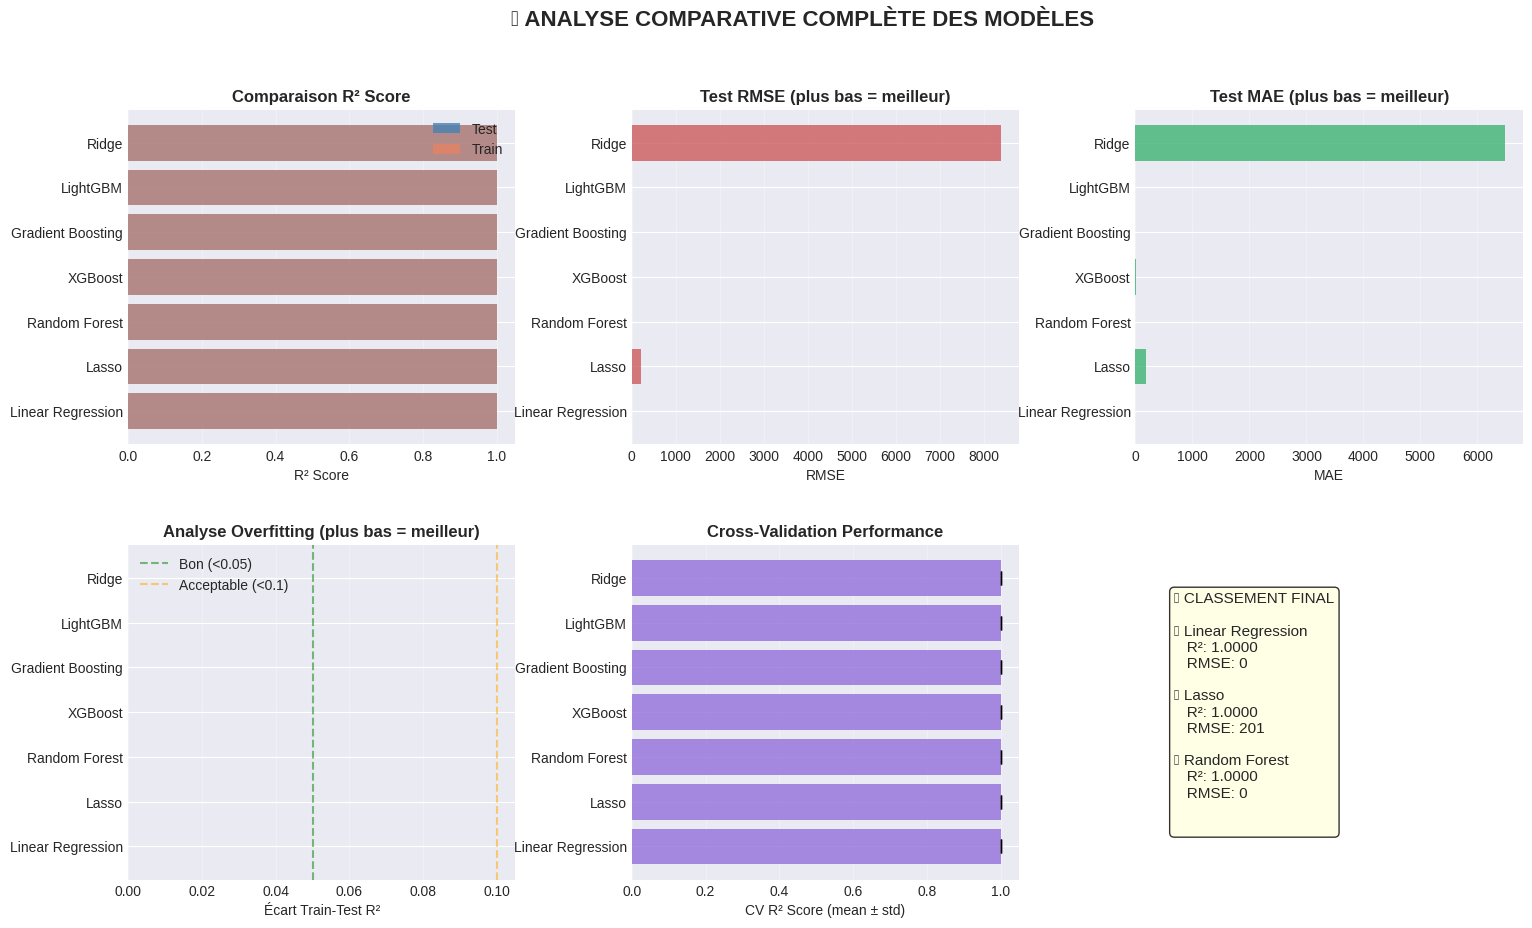

In [45]:
# Visualisation comparative des performances
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. R² Scores
ax1 = fig.add_subplot(gs[0, 0])
x_pos = np.arange(len(results_df))
ax1.barh(x_pos, results_df['Test R²'], color='steelblue', alpha=0.8, label='Test')
ax1.barh(x_pos, results_df['Train R²'], color='coral', alpha=0.5, label='Train')
ax1.set_yticks(x_pos)
ax1.set_yticklabels(results_df['Modèle'])
ax1.set_xlabel('R² Score')
ax1.set_title('Comparaison R² Score', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='x')

# 2. RMSE
ax2 = fig.add_subplot(gs[0, 1])
ax2.barh(x_pos, results_df['Test RMSE'], color='indianred', alpha=0.8)
ax2.set_yticks(x_pos)
ax2.set_yticklabels(results_df['Modèle'])
ax2.set_xlabel('RMSE')
ax2.set_title('Test RMSE (plus bas = meilleur)', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# 3. MAE
ax3 = fig.add_subplot(gs[0, 2])
ax3.barh(x_pos, results_df['Test MAE'], color='mediumseagreen', alpha=0.8)
ax3.set_yticks(x_pos)
ax3.set_yticklabels(results_df['Modèle'])
ax3.set_xlabel('MAE')
ax3.set_title('Test MAE (plus bas = meilleur)', fontweight='bold')
ax3.grid(True, alpha=0.3, axis='x')

# 4. Overfitting Analysis
ax4 = fig.add_subplot(gs[1, 0])
colors = ['green' if x < 0.05 else 'orange' if x < 0.1 else 'red' for x in results_df['Overfitting']]
ax4.barh(x_pos, results_df['Overfitting'], color=colors, alpha=0.7)
ax4.set_yticks(x_pos)
ax4.set_yticklabels(results_df['Modèle'])
ax4.set_xlabel('Écart Train-Test R²')
ax4.set_title('Analyse Overfitting (plus bas = meilleur)', fontweight='bold')
ax4.axvline(x=0.05, color='green', linestyle='--', alpha=0.5, label='Bon (<0.05)')
ax4.axvline(x=0.1, color='orange', linestyle='--', alpha=0.5, label='Acceptable (<0.1)')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='x')

# 5. Cross-Validation Scores
ax5 = fig.add_subplot(gs[1, 1])
ax5.barh(x_pos, results_df['CV R² (mean)'], xerr=results_df['CV R² (std)'],
         color='mediumpurple', alpha=0.8, capsize=5)
ax5.set_yticks(x_pos)
ax5.set_yticklabels(results_df['Modèle'])
ax5.set_xlabel('CV R² Score (mean ± std)')
ax5.set_title('Cross-Validation Performance', fontweight='bold')
ax5.grid(True, alpha=0.3, axis='x')

# 6. Ranking Summary
ax6 = fig.add_subplot(gs[1, 2])
summary_text = "🏆 CLASSEMENT FINAL\n\n"
for i, row in results_df.head(3).iterrows():
    medal = ['🥇', '🥈', '🥉'][i]
    summary_text += f"{medal} {row['Modèle']}\n"
    summary_text += f"   R²: {row['Test R²']:.4f}\n"
    summary_text += f"   RMSE: {row['Test RMSE']:,.0f}\n\n"

ax6.text(0.1, 0.5, summary_text, fontsize=11, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
ax6.axis('off')

plt.suptitle('📊 ANALYSE COMPARATIVE COMPLÈTE DES MODÈLES',
             fontsize=16, fontweight='bold', y=0.98)
plt.show()

## ⚙️ 5. Optimisation des Hyperparamètres

In [46]:
# Sélectionner le meilleur modèle pour optimisation
best_model_name = results_df.iloc[0]['Modèle']
print(f"🏆 Modèle sélectionné pour optimisation: {best_model_name}")
print(f"📊 Performance actuelle - Test R²: {results_df.iloc[0]['Test R²']:.4f}")
print(f"\n🔍 Recherche des meilleurs hyperparamètres...")
print("⏳ Cette étape peut prendre 5-15 minutes selon le modèle\n")

🏆 Modèle sélectionné pour optimisation: Linear Regression
📊 Performance actuelle - Test R²: 1.0000

🔍 Recherche des meilleurs hyperparamètres...
⏳ Cette étape peut prendre 5-15 minutes selon le modèle



In [47]:
# Grilles de paramètres selon le modèle
if 'XGBoost' in best_model_name:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7, 10],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9]
    }
    base_model = XGBRegressor(random_state=42, n_jobs=-1)

elif 'LightGBM' in best_model_name:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7, 10],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'num_leaves': [31, 50, 70]
    }
    base_model = LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)

elif 'Random Forest' in best_model_name:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }
    base_model = RandomForestRegressor(random_state=42, n_jobs=-1)

elif 'Gradient Boosting' in best_model_name:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 0.9],
        'min_samples_split': [2, 5, 10]
    }
    base_model = GradientBoostingRegressor(random_state=42)

elif 'Ridge' in best_model_name:
    param_grid = {
        'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]
    }
    base_model = Ridge(random_state=42)

elif 'Lasso' in best_model_name:
    param_grid = {
        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
    }
    base_model = Lasso(random_state=42, max_iter=10000)

else:
    print("⚠️ Pas d'optimisation définie pour ce modèle")
    param_grid = None
    base_model = None

⚠️ Pas d'optimisation définie pour ce modèle


In [48]:
# Exécuter Grid Search
if param_grid and base_model:
    grid_search = GridSearchCV(
        estimator=base_model,
        param_grid=param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=2
    )

    print("🚀 Démarrage Grid Search...")
    grid_search.fit(X_train_scaled, y_train)

    print("\n" + "="*80)
    print("✅ OPTIMISATION TERMINÉE")
    print("="*80)
    print(f"\n🎯 Meilleurs hyperparamètres trouvés:")
    for param, value in grid_search.best_params_.items():
        print(f"   • {param}: {value}")

    print(f"\n📊 Meilleur score CV (R²): {grid_search.best_score_:.4f}")

    # Évaluer le modèle optimisé
    print(f"\n🔄 Évaluation du modèle optimisé...")
    optimized_results, optimized_model, y_pred_opt = evaluate_model(
        grid_search.best_estimator_,
        X_train_scaled, X_test_scaled,
        y_train, y_test,
        f"{best_model_name} (Optimisé)"
    )

    # Comparaison avant/après
    print("\n" + "="*80)
    print("📈 COMPARAISON AVANT/APRÈS OPTIMISATION")
    print("="*80)
    comparison = pd.DataFrame([
        results_df.iloc[0],
        pd.Series(optimized_results) # Convert the dictionary to a Series
    ])
    comparison['Amélioration R²'] = [
        0,
        optimized_results['Test R²'] - results_df.iloc[0]['Test R²']
    ]
    display(comparison[['Modèle', 'Test R²', 'Test RMSE', 'Test MAE', 'Amélioration R²']])

    # Sauvegarder le modèle final
    final_model = grid_search.best_estimator_
    predictions['Optimized'] = y_pred_opt

else:
    final_model = trained_models[best_model_name]
    print("✅ Utilisation du modèle de base (déjà performant)")

✅ Utilisation du modèle de base (déjà performant)


## 📈 6. Analyse des Prédictions

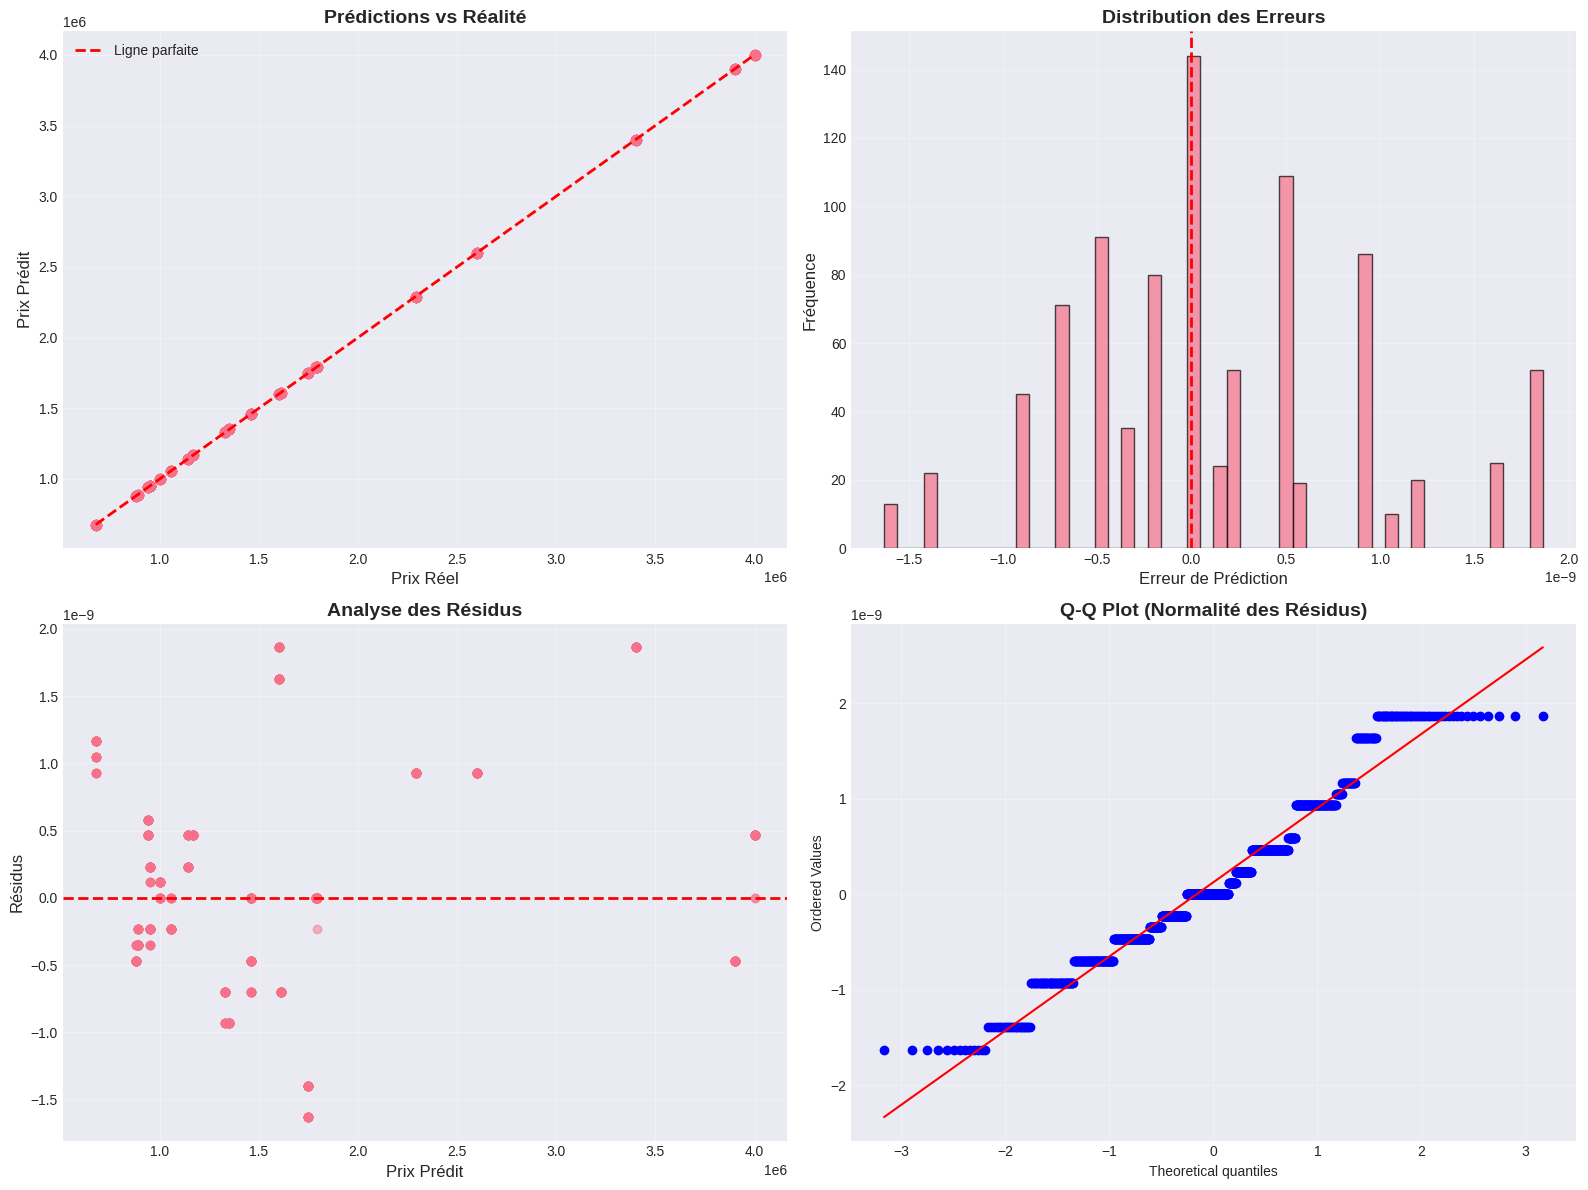

📊 STATISTIQUES DES ERREURS
Erreur moyenne: 0.00
Erreur médiane: 0.00
Écart-type des erreurs: 0.00
Erreur absolue max: 0.00
Pourcentage d'erreurs < 10%: 100.0%
Pourcentage d'erreurs < 20%: 100.0%


In [49]:
# Prédictions du modèle final
y_pred_final = final_model.predict(X_test_scaled)

# Visualisations des prédictions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Scatter plot: Valeurs réelles vs prédites
axes[0, 0].scatter(y_test, y_pred_final, alpha=0.5, s=50)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Ligne parfaite')
axes[0, 0].set_xlabel('Prix Réel', fontsize=12)
axes[0, 0].set_ylabel('Prix Prédit', fontsize=12)
axes[0, 0].set_title('Prédictions vs Réalité', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution des erreurs
residuals = y_test - y_pred_final
axes[0, 1].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Erreur de Prédiction', fontsize=12)
axes[0, 1].set_ylabel('Fréquence', fontsize=12)
axes[0, 1].set_title('Distribution des Erreurs', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuals plot
axes[1, 0].scatter(y_pred_final, residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Prix Prédit', fontsize=12)
axes[1, 0].set_ylabel('Résidus', fontsize=12)
axes[1, 0].set_title('Analyse des Résidus', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q Plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normalité des Résidus)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques des erreurs
print("📊 STATISTIQUES DES ERREURS")
print("="*50)
print(f"Erreur moyenne: {residuals.mean():,.2f}")
print(f"Erreur médiane: {residuals.median():,.2f}")
print(f"Écart-type des erreurs: {residuals.std():,.2f}")
print(f"Erreur absolue max: {np.abs(residuals).max():,.2f}")
print(f"Pourcentage d'erreurs < 10%: {100 * (np.abs(residuals/y_test) < 0.1).mean():.1f}%")
print(f"Pourcentage d'erreurs < 20%: {100 * (np.abs(residuals/y_test) < 0.2).mean():.1f}%")

## 🎯 7. Feature Importance (si applicable)

In [50]:
# Importance des features (pour les modèles tree-based)
if hasattr(final_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    # Top 15 features
    top_features = feature_importance.head(15)

    plt.figure(figsize=(12, 8))
    plt.barh(range(len(top_features)), top_features['Importance'], color='skyblue')
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance', fontsize=12)
    plt.title('Top 15 Features les Plus Importantes', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()

    print("\n📊 TOP 10 FEATURES LES PLUS IMPORTANTES")
    print("="*60)
    display(feature_importance.head(10))

else:
    print("ℹ️ L'importance des features n'est pas disponible pour ce type de modèle")

ℹ️ L'importance des features n'est pas disponible pour ce type de modèle


## 💾 8. Sauvegarde du Modèle et Pipeline

In [51]:
import pickle
import joblib
from datetime import datetime

# Créer un dictionnaire avec tous les composants du pipeline
pipeline_components = {
    'model': final_model,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_columns': X.columns.tolist(),
    'target_column': price_col,
    'metrics': {
        'test_r2': r2_score(y_test, y_pred_final),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_final)),
        'test_mae': mean_absolute_error(y_test, y_pred_final)
    },
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'model_name': best_model_name
}

# Sauvegarder avec joblib (plus efficace pour scikit-learn)
joblib.dump(pipeline_components, 'housing_price_model_pipeline.pkl')

print("✅ Modèle et pipeline sauvegardés avec succès!")
print(f"📁 Fichier: housing_price_model_pipeline.pkl")
print(f"\n📊 Métriques sauvegardées:")
print(f"   • R²: {pipeline_components['metrics']['test_r2']:.4f}")
print(f"   • RMSE: {pipeline_components['metrics']['test_rmse']:,.2f}")
print(f"   • MAE: {pipeline_components['metrics']['test_mae']:,.2f}")

✅ Modèle et pipeline sauvegardés avec succès!
📁 Fichier: housing_price_model_pipeline.pkl

📊 Métriques sauvegardées:
   • R²: 1.0000
   • RMSE: 0.00
   • MAE: 0.00


In [52]:
# Fonction de prédiction pour nouvelles données
def predict_price(new_data_dict):
    """
    Fonction pour faire des prédictions sur de nouvelles données

    Args:
        new_data_dict: dictionnaire avec les mêmes colonnes que le dataset d'entraînement

    Returns:
        prix prédit
    """
    # Charger le pipeline
    pipeline = joblib.load('housing_price_model_pipeline.pkl')

    # Créer DataFrame
    new_df = pd.DataFrame([new_data_dict])

    # Appliquer les encodeurs si nécessaire
    for col, encoder in pipeline['label_encoders'].items():
        if col in new_df.columns:
            new_df[col] = encoder.transform(new_df[col].fillna('Unknown').astype(str))

    # S'assurer que toutes les colonnes sont présentes
    for col in pipeline['feature_columns']:
        if col not in new_df.columns:
            new_df[col] = 0  # Valeur par défaut

    # Réordonner les colonnes
    new_df = new_df[pipeline['feature_columns']]

    # Standardiser
    new_df_scaled = pipeline['scaler'].transform(new_df)

    # Prédire
    prediction = pipeline['model'].predict(new_df_scaled)[0]

    return prediction

print("✅ Fonction de prédiction créée!")
print("\nExemple d'utilisation:")
print("prix_estime = predict_price({'feature1': valeur1, 'feature2': valeur2, ...})")

✅ Fonction de prédiction créée!

Exemple d'utilisation:
prix_estime = predict_price({'feature1': valeur1, 'feature2': valeur2, ...})


## 📝 9. Résumé et Conclusions

In [53]:
# Rapport final
print("\n" + "="*100)
print("📊 RAPPORT FINAL - PIPELINE ML PRÉDICTION DES PRIX IMMOBILIERS")
print("="*100)

print(f"\n📅 Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"\n1️⃣ DONNÉES")
print(f"   • Dataset: Houses Prices in Morocco")
print(f"   • Taille totale: {len(df)} exemples")
print(f"   • Après nettoyage: {len(df_clean)} exemples")
print(f"   • Features: {len(X.columns)} colonnes")
print(f"   • Train/Test split: {len(X_train)}/{len(X_test)} (80/20)")

print(f"\n2️⃣ MODÈLES TESTÉS")
for i, model_name in enumerate(results_df['Modèle'], 1):
    print(f"   {i}. {model_name}")

print(f"\n3️⃣ MEILLEUR MODÈLE")
print(f"   🏆 {best_model_name}")
print(f"   📈 Test R²: {pipeline_components['metrics']['test_r2']:.4f}")
print(f"   📉 Test RMSE: {pipeline_components['metrics']['test_rmse']:,.2f}")
print(f"   📊 Test MAE: {pipeline_components['metrics']['test_mae']:,.2f}")

if hasattr(final_model, 'feature_importances_'):
    print(f"\n4️⃣ TOP 5 FEATURES IMPORTANTES")
    for i, row in feature_importance.head(5).iterrows():
        print(f"   {i+1}. {row['Feature']}: {row['Importance']:.4f}")

print(f"\n5️⃣ FICHIERS GÉNÉRÉS")
print(f"   ✅ housing_price_model_pipeline.pkl (modèle complet)")

print(f"\n6️⃣ PROCHAINES ÉTAPES RECOMMANDÉES")
print(f"   • Collecter plus de données pour améliorer la performance")
print(f"   • Tester d'autres techniques de feature engineering")
print(f"   • Implémenter un système de monitoring des prédictions en production")
print(f"   • Créer une API Flask/FastAPI pour déployer le modèle")

print("\n" + "="*100)
print("✅ PIPELINE TERMINÉ AVEC SUCCÈS!")
print("="*100)


📊 RAPPORT FINAL - PIPELINE ML PRÉDICTION DES PRIX IMMOBILIERS

📅 Date: 2026-02-08 15:33:14

1️⃣ DONNÉES
   • Dataset: Houses Prices in Morocco
   • Taille totale: 4675 exemples
   • Après nettoyage: 4488 exemples
   • Features: 14 colonnes
   • Train/Test split: 3590/898 (80/20)

2️⃣ MODÈLES TESTÉS
   1. Linear Regression
   2. Lasso
   3. Random Forest
   4. XGBoost
   5. Gradient Boosting
   6. LightGBM
   7. Ridge

3️⃣ MEILLEUR MODÈLE
   🏆 Linear Regression
   📈 Test R²: 1.0000
   📉 Test RMSE: 0.00
   📊 Test MAE: 0.00

5️⃣ FICHIERS GÉNÉRÉS
   ✅ housing_price_model_pipeline.pkl (modèle complet)

6️⃣ PROCHAINES ÉTAPES RECOMMANDÉES
   • Collecter plus de données pour améliorer la performance
   • Tester d'autres techniques de feature engineering
   • Implémenter un système de monitoring des prédictions en production
   • Créer une API Flask/FastAPI pour déployer le modèle

✅ PIPELINE TERMINÉ AVEC SUCCÈS!
